In [2]:
import pandas as pd
import numpy as np
import seaborn
%matplotlib inline
import matplotlib as mlp
import matplotlib.pyplot as plt
import math
import geojson
from descartes import PolygonPatch
import matplotlib.pyplot as plt
# from mpl_toolkits.basemap import Basemap
import numpy as np
mlp.rcParams['figure.figsize'] = 15, 6

In [3]:
epivigila = pd.read_csv("../../DATOS/MSPAS/EPIVIGILA - Semana 52 2017 csv/Epivigila a Dic 2017.csv")
patos = pd.read_csv("../../DATOS/MSPAS/EPIVIGILA - Semana 52 2017 csv/DataConfig-PatoSNVS.csv")
estabs = pd.read_csv("../../DATOS/MSPAS/EPIVIGILA - Semana 52 2017 csv/DataConfig-Establecimientos.csv")

In [4]:
epivigila.columns, patos.columns, estabs.columns

(Index(['Anio', 'Semana', 'Id_establecimiento', 'Id_patologia', 'GRUPO_EDAD',
        'Casos', 'Varon', 'Mujer'],
       dtype='object'),
 Index(['IdPatoSNVS', 'PATOLOGIA', 'CODIGO_CIE_10', 'Nacion', 'Categoria',
        'NoSex', 'NoEdad'],
       dtype='object'),
 Index(['ID_ESTABLECIMIENTO', 'ESTABLECIMIENTO', 'ID_LOCALIDAD', 'Padre',
        'Nivel', 'OrdenEst', 'Arbol', 'IdServicio', 'TServicio', 'Encargado',
        'Direccion', 'Telefonos', 'email', 'DistanciaDAS', 'Jefe', 'NotasMap',
        ' "X17"'],
       dtype='object'))

In [7]:
epimerge = epivigila.merge(estabs[["ID_ESTABLECIMIENTO", "Padre"]], "left", left_on = "Id_establecimiento", right_on = "ID_ESTABLECIMIENTO")
#.merge(patos, "left", left_on = "Id_patologia", right_on = "IdPatoSNVS")\

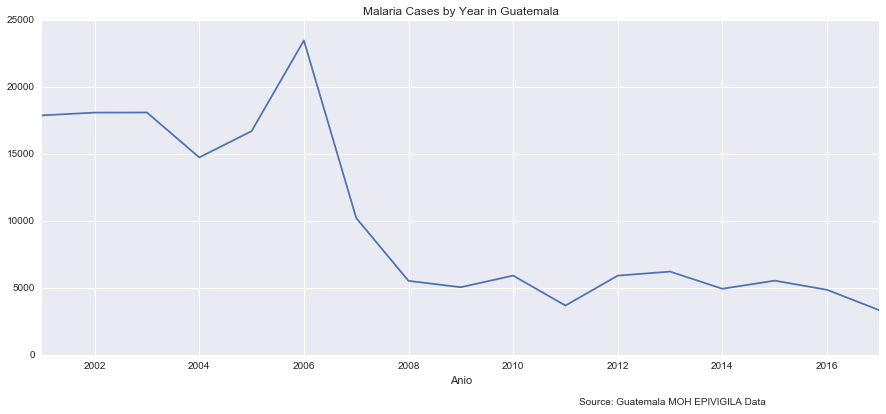

In [37]:
epimerge[epimerge.Id_patologia.isin([27,28,29])].groupby(["Anio"]).Casos.sum().plot()
plt.title("Malaria Cases by Year in Guatemala")
plt.annotate("Source: Guatemala MOH EPIVIGILA Data", 
             (1,0), (-300, -50), xycoords='axes fraction', textcoords='offset points')

In [48]:
malariamunits = epimerge[epimerge.Id_patologia.isin([27,28,29])].groupby(["Anio", "Padre", "Semana", "GRUPO_EDAD"])\
.agg({ "Casos" : sum, "Varon": sum, "Mujer": sum})

In [51]:
malariamunits = malariamunits.reset_index()
malariamunits.columns = ["Year", "Muni", "Week", "AgeGroup", "FemaleCases", "MaleCases", "TotalCases"] 

In [54]:
malariamunits.to_csv("../../DATOS/MSPAS/EPIVIGILA - Semana 52 2017 csv/MalariaMunisGt 2001-2017.csv")

In [5]:
munisepiv = pd.read_csv("../../DATOS/MSPAS/EPIVIGILA - Semana 52 2017 csv/MalariaMunisGt 2001-2017.csv")

In [6]:
munisepiv.columns

Index(['Unnamed: 0', 'Year', 'Muni', 'Week', 'AgeGroup', 'FemaleCases',
       'MaleCases', 'TotalCases'],
      dtype='object')

In [9]:
munisepiv["Depto"] = munisepiv.Muni.map(lambda x: int(x/100))

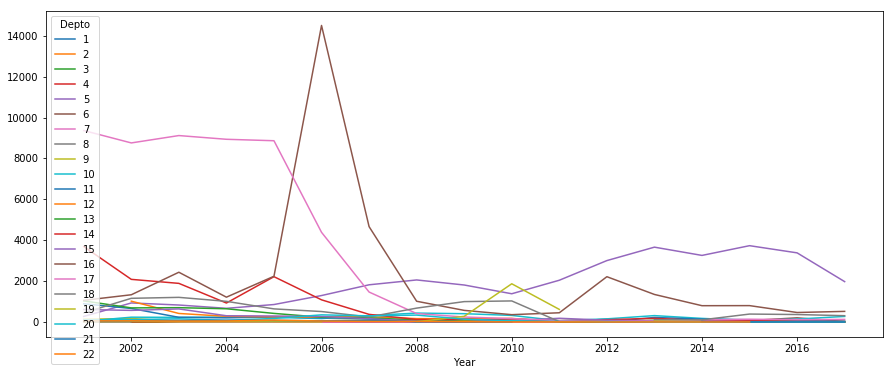

In [12]:
munisepiv.groupby(["Depto", "Year"]).TotalCases.sum().unstack(1).T.plot()

In [13]:
munisepiv.groupby(["Depto", "Year"]).TotalCases.sum().unstack(1)

Year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Depto,,,,,,,,,,,,,,,,,
1,NaN,32.0,18.0,16.0,10.0,10.0,12.0,9.0,5.0,4.0,NaN,4.0,14.0,30.0,16.0,17.0,11.0
2,6.0,15.0,16.0,NaN,2.0,1.0,2.0,3.0,6.0,NaN,1.0,1.0,NaN,NaN,1.0,NaN,2.0
3,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0,2.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN
4,NaN,6.0,1.0,4.0,11.0,5.0,5.0,1.0,3.0,3.0,4.0,1.0,7.0,21.0,12.0,3.0,1.0
5,272.0,931.0,830.0,669.0,854.0,1294.0,1819.0,2056.0,1809.0,1381.0,2042.0,3003.0,3660.0,3256.0,3732.0,3381.0,1974.0
6,45.0,85.0,42.0,3.0,36.0,49.0,12.0,3.0,9.0,19.0,4.0,140.0,18.0,16.0,71.0,203.0,23.0
7,75.0,72.0,8.0,5.0,3.0,1.0,8.0,2.0,12.0,2.0,2.0,NaN,29.0,16.0,18.0,6.0,2.0
8,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,134.0,172.0,33.0,54.0,38.0,57.0,88.0,72.0,78.0,148.0,43.0,86.0,28.0,16.0,6.0,7.0,1.0


In [14]:
munisepiv.groupby(["Year"]).TotalCases.sum()

Year
2001    17881
2002    18086
2003    18093
2004    14738
2005    16701
2006    23469
2007    10218
2008     5521
2009     5046
2010     5915
2011     3676
2012     5912
2013     6214
2014     4931
2015     5536
2016     4853
2017     3332
Name: TotalCases, dtype: int64

In [15]:
# El sistema NAD del subprograma de malaria tiene los siguientes datos: 
# 1: 2015 5406, diff = 130
# 2: 2016 4789, diff = 64
# 3: 2017 4077, diff = -745
# 4: 2018 3078

In [18]:
munisepiv.groupby(["Year"]).agg({"FemaleCases": "sum", "MaleCases": "sum"}).assign(reldiff = lambda x : x.MaleCases / (x.FemaleCases + x.MaleCases) )

,MaleCases,FemaleCases,reldiff
Year,,,
2001,8987,8894,0.502601
2002,9510,8576,0.525821
2003,9414,8679,0.520312
2004,7843,6895,0.532162
2005,8637,8064,0.517155
2006,12589,10880,0.536410
2007,5440,4778,0.532394
2008,2922,2599,0.529252
2009,2638,2408,0.522790
